MODEL OLUŞTURMA


In [28]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
veri_yol = '/content/drive/MyDrive/Colab Notebooks/Advertising.csv'
veri = pd.read_csv(veri_yol)
X = veri[["Newspaper"]]
y = veri['Sales']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
#print(y_pred)
#MSE HESABI
mse=mean_squared_error(y_test,y_pred)
print("MSE Hata skoru",mse)

MSE Hata skoru 28.68426548084848


#KATSAYILAR VE KESİŞİM NOKTASI

In [20]:
print("Katsayılar",model.coef_)#Y=7.06+0.0482X

print("Kesişim Noktası",model.intercept_)

Katsayılar [0.04822451]
Kesişim Noktası 7.066582521696444


Model Grafiği

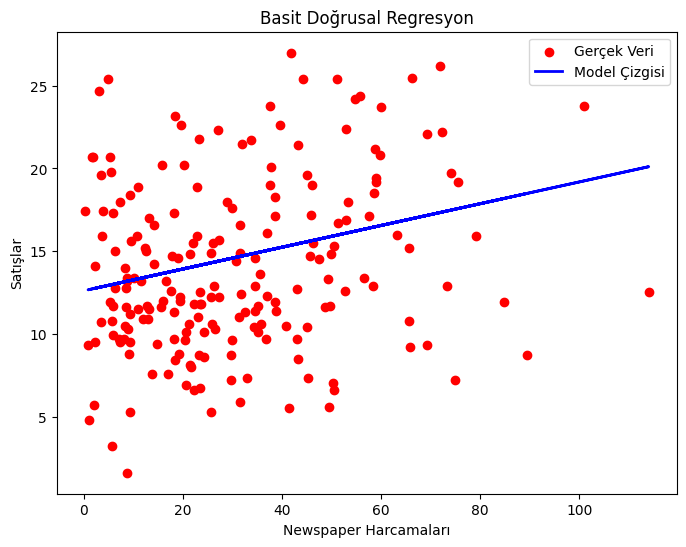

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(X,y,color='red',label="Gerçek Veri")
plt.plot(X_test,y_pred,color='blue',linewidth=2,label="Model Çizgisi")
plt.title("Basit Doğrusal Regresyon")
plt.xlabel("Newspaper Harcamaları")
plt.ylabel("Satışlar")
plt.legend()
plt.show()

#Çoklu Doğrusal Regresyon

In [33]:
X=veri[["TV","Radio","Newspaper"]]
y=veri["Sales"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


#Model Oluşturma

In [34]:
model=LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [36]:
y_pred=model.predict(X_test)

In [37]:
mse=mean_squared_error(y_test,y_pred)
print("MSE Hata skoru:",mse)

MSE Hata skoru: 3.1740973539761033


In [38]:
print("Katsayılar",model.coef_)
print("Kesişim Noktası",model.intercept_)

Katsayılar [0.04472952 0.18919505 0.00276111]
Kesişim Noktası 2.979067338122629


#Ev Fiyatları

In [42]:
from sklearn.datasets import fetch_california_housing
evler=fetch_california_housing()
veri=pd.DataFrame(data=evler.data,columns=evler.feature_names)
print(veri.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [43]:
veri["PRICE"]=evler.target
print(veri.head(10))

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5  4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6  3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7  3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   
8  2.0804      42.0  4.294118   1.117647      1206.0  2.026891     37.84   
9  3.6912      52.0  4.970588   0.990196      1551.0  2.172269     37.84   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  
5    -122.25  2.697  
6    -122

In [46]:
X=veri.drop("PRICE",axis=1)
y=veri["PRICE"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [47]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [49]:
y_pred=model.predict(X_test)

In [50]:
mse=mean_squared_error(y_test,y_pred)
print("MSE Hata Skoru",mse)

MSE Hata Skoru 0.5558915986952444


In [51]:
print("Katsayılar",model.coef_)
print("Kesişim Noktası",model.intercept_)

Katsayılar [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
Kesişim Noktası -37.02327770606409


#PCA

In [52]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
olcek=StandardScaler()
X_olcekli=olcek.fit_transform(X)


#PCA ile Boyut Azaltma

In [69]:
pca=PCA(n_components=7)
x_pca=pca.fit_transform(X_olcekli)

In [70]:
X_train,X_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [71]:
y_pred=model.predict(X_test)

In [72]:
mse=mean_squared_error(y_test,y_pred)
print("MSE Hata Skoru",mse)

MSE Hata Skoru 0.7397486625834692


In [73]:
print("Katsayılar",model.coef_)
print("Kesişim Noktası",model.intercept_)

Katsayılar [ 2.28590243e-02  1.29784118e-01  4.27839198e-02  7.48202744e-01
 -6.44323093e-04]
Kesişim Noktası 2.0684587310083353


#PLS

In [87]:
from sklearn.cross_decomposition import PLSRegression
pls = PLSRegression(n_components=7)
pls.fit(X_train,y_train)
y_pred = pls.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print('MSE:',mse)

ValueError: `n_components` upper bound is 3. Got 7 instead. Reduce `n_components`.

#Ridge Regresyonu

In [84]:
from sklearn.linear_model import Ridge
veri_yol='/content/drive/MyDrive/Colab Notebooks/Advertising.csv'
veri=pd.read_csv(veri_yol)
X=veri[["TV","Radio","Newspaper"]]
y=veri["Sales"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
ridge=Ridge(alpha=0.4)
ridge.fit(X_train,y_train)

Ridge(alpha=0.004)

In [85]:
y_pred=ridge.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print("MSE Hata Skoru",mse)

MSE Hata Skoru 3.1740973437739104


In [83]:
print("Katsayılar",ridge.coef_)
print("Kesişim Noktası",ridge.intercept_)

Katsayılar [0.04472957 0.18916958 0.00276814]
Kesişim Noktası 2.9794320990399292


# Yeni Bölüm

In [14]:
from google.colab import drive
drive.mount('/content/drive')
veri_yol='/content/drive/MyDrive/Colab Notebooks/Advertising.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


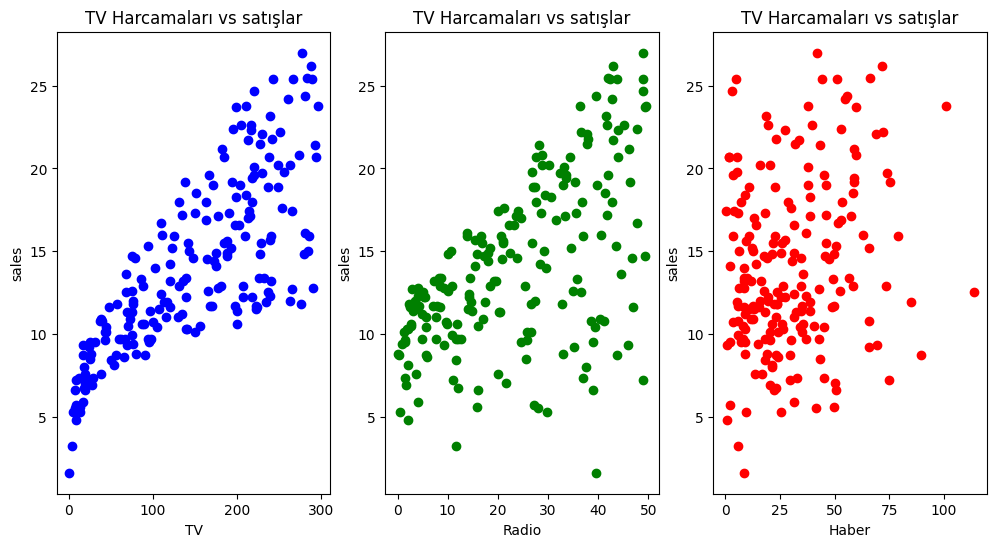

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
veri = pd.read_csv(veri_yol)
plt.figure(figsize= (12,6))

plt.subplot(1,3,1)
plt.scatter(veri.TV,veri.Sales,color='blue')
plt.title('TV Harcamaları vs satışlar')
plt.xlabel('TV')
plt.ylabel('sales')

plt.subplot(1,3,2)
plt.scatter(veri["Radio"],veri["Sales"],color='green')
plt.title('TV Harcamaları vs satışlar')
plt.xlabel('Radio')
plt.ylabel('sales')

plt.subplot(1,3,3)
plt.scatter(veri["Newspaper"],veri["Sales"],color='red')
plt.title('TV Harcamaları vs satışlar')
plt.xlabel('Haber')
plt.ylabel('sales')
plt.show()